# Images as arrays

In the chapter about data structures, we have seen that images are imported as a specific data structure called an ```array```. These arrays are implemented by a package called Numpy which is foundational to the entire scientific Python ecosystem: as soon as you have to perform numerical computations, it's very likely that you will use Numpy arrays. Here we give an introduction to these arrays, specifically using images as examples. 

Let us first import the Numpy package as well as scikit-image which will allow us to import images and Matplotlib with which we can look at images:

In [1]:
import numpy as np
import skimage
import skimage.io
from microfilm.microplot import microshow

We import again an image using the ```skimage.io.imread``` function with a url from an online microscopy repository. This is fluorescence microscopy image of Saccharomyces cerevisiae with a signal accumulating in the vacuoles.

In [2]:
image = skimage.io.imread('../data/HeLa_single.tif')

In [3]:
image

array([[ 661,  650,  669, ...,  482,  558,  545],
       [ 616,  680,  703, ...,  587,  526,  490],
       [ 644,  683,  677, ...,  538,  567,  523],
       ...,
       [ 974,  996, 1026, ...,  833,  846,  793],
       [1023, 1029,  917, ...,  755,  834,  838],
       [ 959,  947, 1005, ...,  796,  838,  797]], dtype=uint16)

In [4]:
type(image)

numpy.ndarray

As the type tells us, and as we can see from the output, the import function returned to us a Numpy ndarray or just array. nd stands for n-dimensional as Numpy can handle data of any dimensions. The above output only shows us a fraction of the image the ```...``` indicating non-displayed values.

## Shape and type

We have seen in the introduction that any variable in Python is more than just a variable: it has also functions (methods) and properties. This is also valid here for Numpy arrays. Arrays have to important properties. First the ```shape```:

In [5]:
image.shape

(540, 540)

The ```shape``` of the arrays describes its size in each dimension. Here these two numbers tell us that our array has 1024 lines and 1360 columns. We can import another image and check its dimensions: 

In [6]:
image2 = skimage.io.imread('../data/idr9036378_cropped.tif')
image2.shape

(14, 8, 2, 262, 290)

We see now that the shape is more complex: here we have in fact 14 time points, 8 z-planes, 2 channels, and images of 262x292 pixels.

The second important property is the ```dtype``` which tells us what is the type of the pixels inside the array. The variable ```image``` is an array but its content can vary: we could have floating point values, integers etc.

In [7]:
image

array([[ 661,  650,  669, ...,  482,  558,  545],
       [ 616,  680,  703, ...,  587,  526,  490],
       [ 644,  683,  677, ...,  538,  567,  523],
       ...,
       [ 974,  996, 1026, ...,  833,  846,  793],
       [1023, 1029,  917, ...,  755,  834,  838],
       [ 959,  947, 1005, ...,  796,  838,  797]], dtype=uint16)

In the above output we see the indication ```uint16``` which tells us we have unsigned (no negative values) integers in 16 bit, i.e. up to $2^{16}$ different possible pixel values.

## Simple image display

In this course, we regularly use the [microfilm](https://github.com/guiwitz/microfilm) library to display microscopy images. We will learn more details about that package and other plotting packages in an next chapter. For the moment we just use the ```microshow``` function:

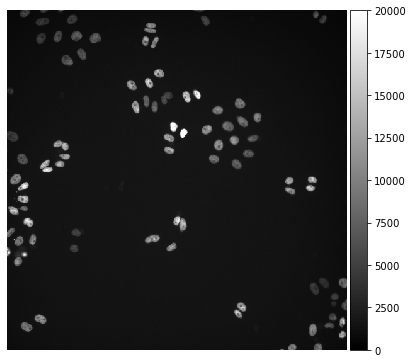

In [13]:
microshow(image, fig_scaling=5, show_colorbar=True, limits=[0,20000]);

In addition to the ```image``` input we also used two *optional* parameters: ```fig_scaling``` controls the size of the image, ```show_colorbar``` allows us to display a color bar and ```limits``` limits the range of values to use.

## Image conversion

We have seen that pixels of an image have a certain type depending on their precision. They can be for example unsigned integer 8bit, float 64 bits etc. Just like in Fiji we can convert images between different types, depending on the requirements of certain functions.

The type of Numpy arrays can be changes using the ```astype``` method. For example:

In [14]:
image.dtype

dtype('<u2')

The short notation ```<u2``` means unsigned integer 2 bytes, or in other words unsigned integer 16 bits. Now we convert it to unsigned integer 8 bit:

In [15]:
image_convert = image.astype(np.uint8)

In [16]:
image_convert.dtype

dtype('uint8')

This direct conversion can lead to strange results. For example if we look at our converted image:

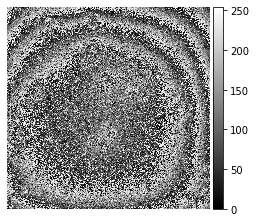

In [17]:
microshow(image_convert, show_colorbar=True);

We see that pixels are indeed within the range 0-255 but it looks like the values of some of them has been badly converted. The reason for this is that Numpy doesn't do any rescaling. Therefore for any value larger than 255 in the 16bit image, we get the remainer of the division by 256. For example a pixel with value 1000 becomes:

In [18]:
1000 % 256

232

In [19]:
np.array(1000, dtype=np.uint16).astype(np.uint8)

array(232, dtype=uint8)

which creates strange artefacts in the image.

The only case where you should not have too much trouble is when converting an integer image to float type, as no information should be lost.

For other cases, a better solution is to use the ```util``` module of scikit-image. There you can find conversion functions that work more as expected. For example to convert our image to 8bit:

In [20]:
image_convert2 = skimage.util.img_as_ubyte(image)

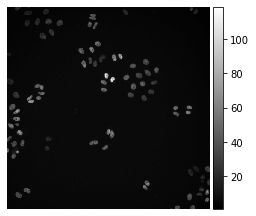

In [21]:
microshow(image_convert2, show_colorbar=True);

Note that here the range of uint16 (0-65535) is rescaled in the 8bit range 0-255, so that not the entire range of 8bit values is used.

## Exercise

1. Using the ```skimage.io.imread``` function as done above, import the file that you can find at this link: https://drive.google.com/u/0/uc?id=13ompUqT7Ti64fStqx76I9j9voWMZWnfA&export=download
2. Display it
3. What is the shape of the image?
4. What is its dtype?
5. Convert the image to unsigned integer 8bit type using ```astype``` and the scikit-image function.
6. Display the two images. What do you observe?